In [1]:
from cluster import ClusterModule
from preprocess import PreprocessModule
from pca import PCAModule

import pandas as pd

In [2]:
X = pd.read_csv("./test.csv")
X = PreprocessModule.selectColumns(X, ["ID", "Timestamp", "Case ID"], exclude=True)
X

,Zmienna A,Zmienna B,Zmienna C,Zmienna D,Zmienna E,Zmienna F,Zmienna G
0,176.8,81.4,60.0,1.0,88.099998,98.739998,0.0
1,178.1,72.6,49.0,1.0,79.400002,95.260002,0.0
2,152.1,60.5,34.0,1.0,79.400002,95.260002,0.0
3,165.1,72.6,53.0,1.0,81.139999,95.260002,0.0
4,176.8,82.5,58.0,1.0,79.400002,97.000000,0.0
...,...,...,...,...,...,...,...
295,114.4,63.8,70.0,1.0,72.440002,90.040001,0.0
296,171.6,69.3,46.0,1.0,79.400002,97.000000,0.0
297,94.9,60.5,31.0,0.0,70.699997,84.820000,0.0
298,157.3,64.9,32.0,1.0,79.400002,93.519997,0.0


In [3]:
import sklearn
from sklearn.impute import SimpleImputer
sklearn.set_config(transform_output="pandas")

imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

# X_preproc = X.copy()
# sklearn.set_config(transform_output="pandas")
# for column, method in [("Zmienna A", "minmax"), ("Zmienna B", "maxabs"), ("Zmienna C", "standard"), ("Zmienna E", "robust"), ("Zmienna F", "quantile")]:
#     PreprocessModule.preprocess(X_preproc, column, method=method)

# X_preproc 

In [4]:
X_preproc = X.copy()
for column in X_preproc.columns:
    PreprocessModule.preprocess(X_preproc, column, method="minmax")

X_preproc

,Zmienna A,Zmienna B,Zmienna C,Zmienna D,Zmienna E,Zmienna F,Zmienna G
0,0.857143,0.769231,0.687500,1.0,0.571429,0.428571,0.0
1,0.870130,0.461538,0.458333,1.0,0.333333,0.333333,0.0
2,0.610390,0.038462,0.145833,1.0,0.333333,0.333333,0.0
3,0.740260,0.461538,0.541667,1.0,0.380952,0.333333,0.0
4,0.857143,0.807692,0.645833,1.0,0.333333,0.380952,0.0
...,...,...,...,...,...,...,...
295,0.233766,0.153846,0.895833,1.0,0.142857,0.190476,0.0
296,0.805195,0.346154,0.395833,1.0,0.333333,0.380952,0.0
297,0.038961,0.038462,0.083333,0.0,0.095238,0.047619,0.0
298,0.662338,0.192308,0.104167,1.0,0.333333,0.285714,0.0


In [5]:
X_pca, explained_variance, loadings = PCAModule.perform_pca(X_preproc)
print(explained_variance)
print(loadings)
print(X_pca)


[0.63518725 0.1428696  0.09762456 0.0532288  0.0453095  0.02197059
 0.0038097 ]
                PC1       PC2       PC3       PC4       PC5       PC6  \
Zmienna A -0.476414 -0.065396 -0.342079 -0.381428 -0.114813  0.701984   
Zmienna B -0.509906  0.276942  0.005605 -0.537725  0.201534 -0.577193   
Zmienna C -0.340702  0.194980  0.863739  0.135128  0.021981  0.284797   
Zmienna D -0.141706 -0.513688  0.186478 -0.141912 -0.771558 -0.256545   
Zmienna E -0.401092  0.068180 -0.218868  0.530114 -0.080730 -0.114439   
Zmienna F -0.409138  0.098073 -0.219636  0.489979 -0.100694 -0.108577   
Zmienna G  0.220450  0.776445 -0.077378 -0.076590 -0.577720  0.047516   

                PC7  
Zmienna A  0.016882  
Zmienna B  0.018789  
Zmienna C  0.002628  
Zmienna D  0.003705  
Zmienna E  0.697093  
Zmienna F -0.716059  
Zmienna G  0.025745  
         pca0      pca1      pca2      pca3      pca4      pca5      pca6
0   -0.488093  0.082336  0.075101 -0.134201  0.038663 -0.024131  0.104355
1   -0.1248

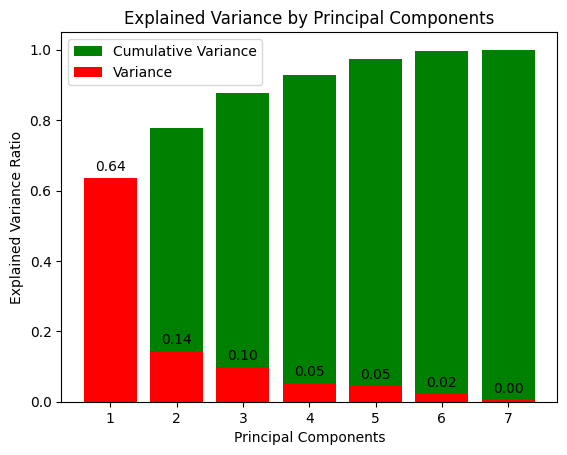

In [6]:
PCAModule.plot_explained_variance(explained_variance);

         PC1        PC2        PC3        PC4        PC5        PC6        PC7
0  Zmienna B  Zmienna G  Zmienna C  Zmienna B  Zmienna D  Zmienna A  Zmienna F
1  Zmienna A  Zmienna D  Zmienna A  Zmienna E  Zmienna G  Zmienna B  Zmienna E
2  Zmienna F  Zmienna B  Zmienna F  Zmienna F  Zmienna B  Zmienna C  Zmienna G
3  Zmienna E  Zmienna C  Zmienna E  Zmienna A  Zmienna A  Zmienna D  Zmienna B
4  Zmienna C  Zmienna F  Zmienna D  Zmienna D  Zmienna F  Zmienna E  Zmienna A


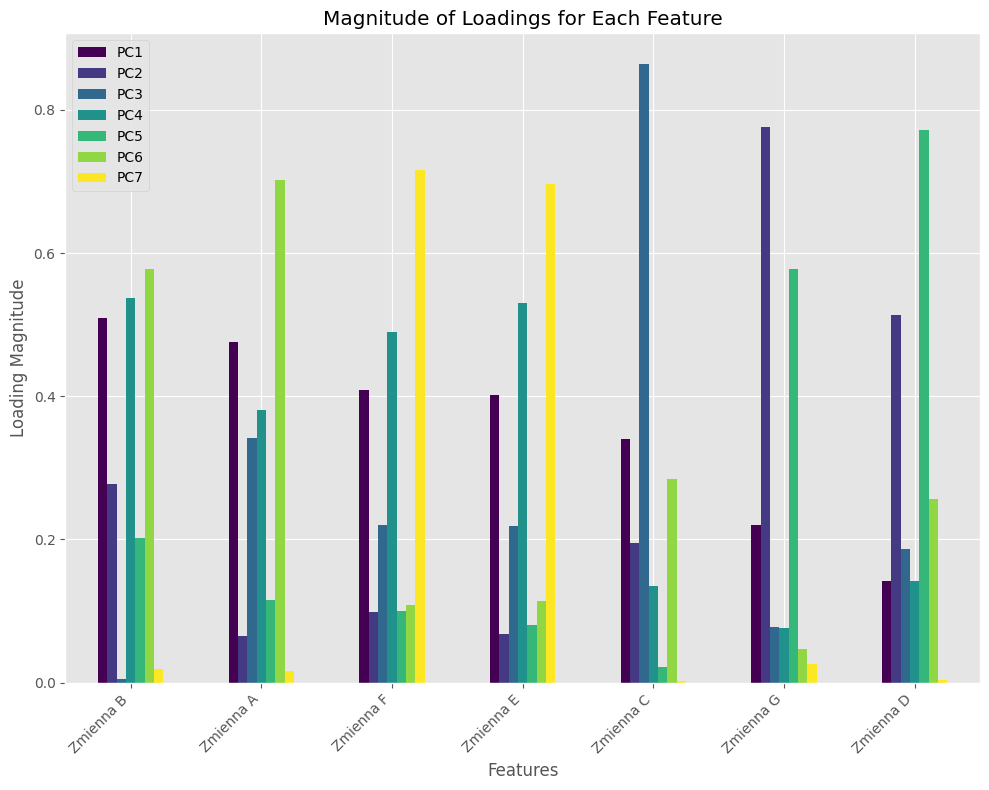

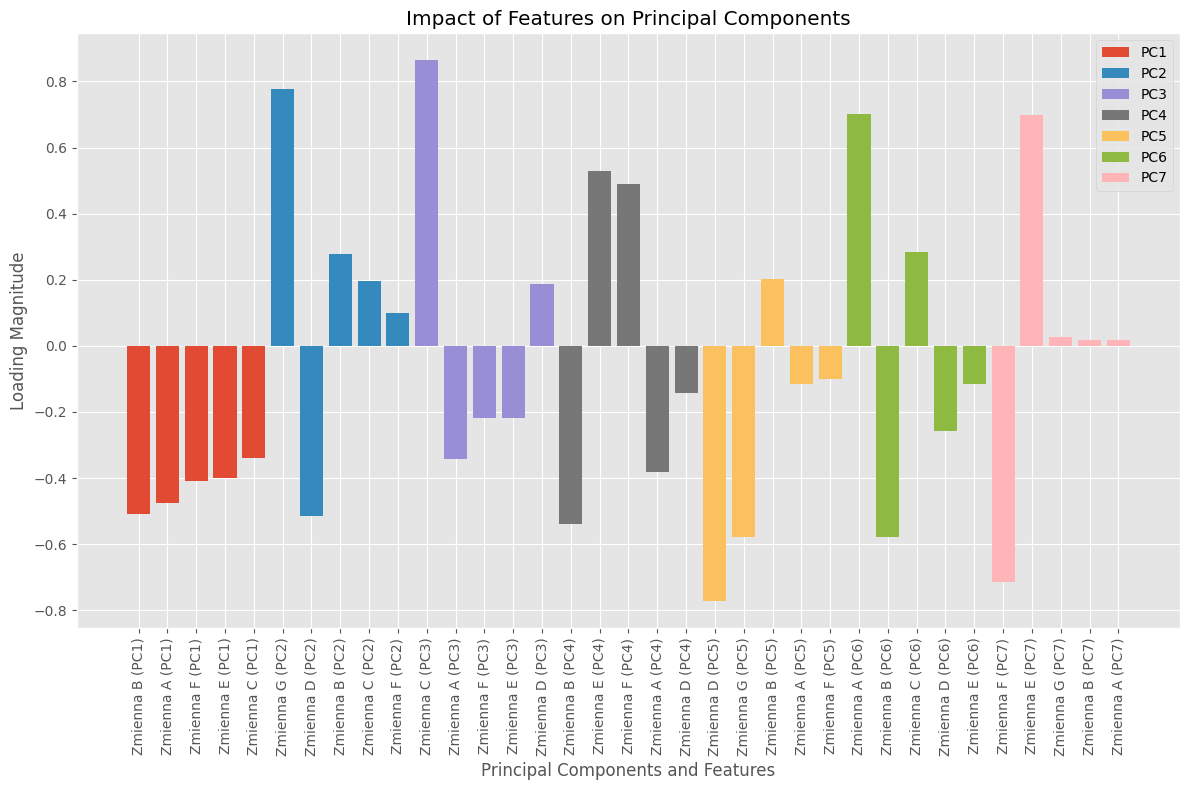

In [12]:
impactful_features = PCAModule.most_impactful_features(loadings)
print(impactful_features)
PCAModule.plot_impactful_features(loadings);
PCAModule.plot_impactful_features_v2(loadings);

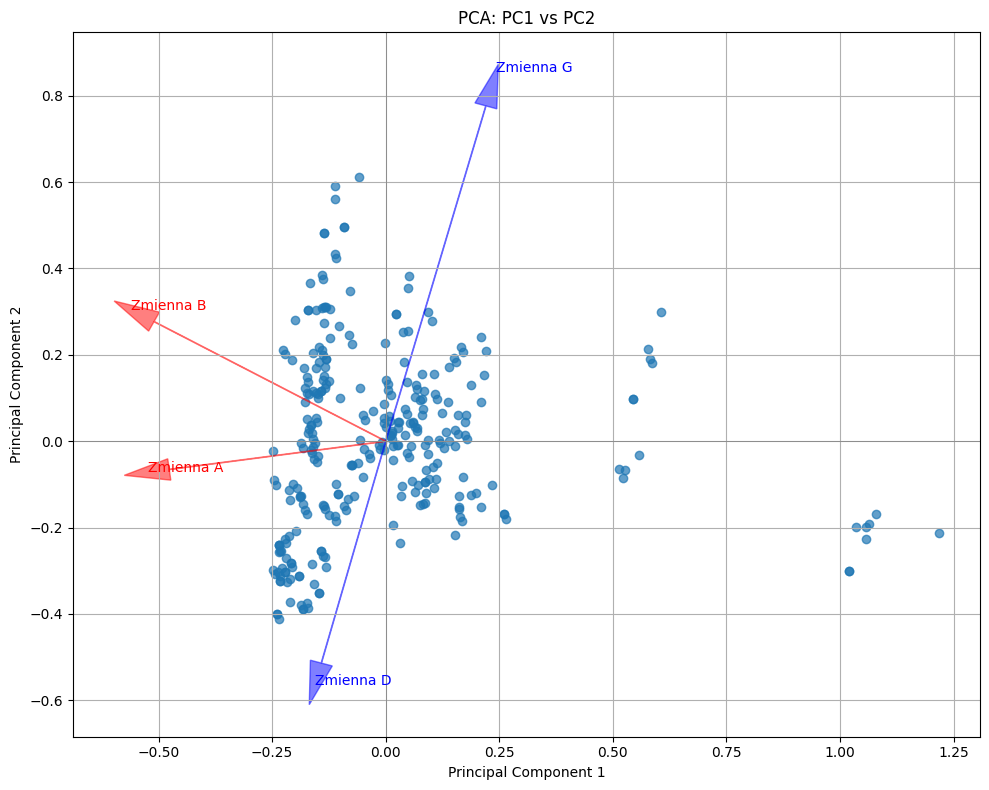

In [8]:
PCAModule.visualize_selected_components(X_pca, loadings, components=[1, 2], top_n_features=2);

In [9]:
ClusterModule.hopkins(X_preproc)

0.9985844254766351

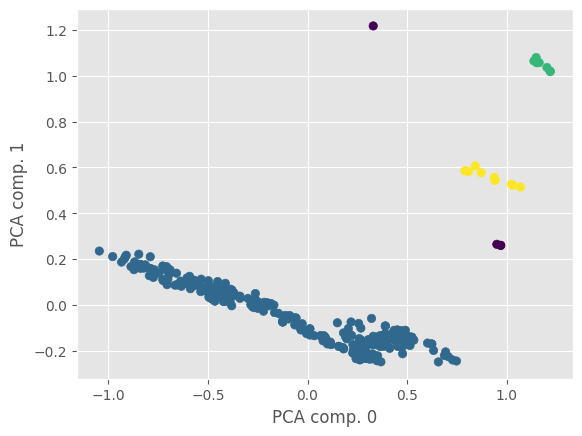

In [10]:
labels = ClusterModule.cluster(X_preproc, method="DBSCAN")
ClusterModule.visualize(X_preproc, labels);

In [11]:
ClusterModule.describe(X, labels)[1]["stat"]

,Zmienna A,Zmienna B,Zmienna C,Zmienna D,Zmienna E,Zmienna F,Zmienna G
count,7.000000,7.000000,7.000000,7.0,7.000000,7.000000e+00,7.0
mean,96.571429,61.914286,31.714286,0.0,68.462857,8.482000e+01,1.0
std,2.456769,1.378923,2.627691,0.0,0.849032,1.534948e-14,0.0
min,91.000000,60.500000,28.000000,0.0,67.220001,8.482000e+01,1.0
25%,97.500000,60.500000,30.000000,0.0,68.090000,8.482000e+01,1.0
50%,97.500000,62.700000,33.000000,0.0,68.959999,8.482000e+01,1.0
75%,97.500000,62.700000,33.500000,0.0,68.959999,8.482000e+01,1.0
max,97.500000,63.800000,34.000000,0.0,68.959999,8.482000e+01,1.0
